In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
#load the data
data=pd.read_csv("insurance_data.csv")

In [3]:
#view of 1st 5 rows
data.head()

index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01

### Overview of Insurance Claim Data

The insurance claim dataset provides a comprehensive look into the factors that influence healthcare costs and claim amounts for insurance policyholders. The data captures various demographic, health, and lifestyle attributes of patients, along with their insurance claim amounts. Here's a brief summary of the key elements:

1. **Identifiers**:
   - **index**: Unique identifier for each row.
   - **PatientID**: Unique identifier for each patient.

2. **Demographic Information**:
   - **age**: The age of the patient.
   - **gender**: The gender of the patient.
   - **region**: The region where the patient lives.

3. **Health Metrics**:
   - **bmi (Body Mass Index)**: Indicates body fat based on height and weight.
   - **bloodpressure**: Blood pressure reading of the patient.
   - **diabetic**: Indicates whether the patient has diabetes.

4. **Lifestyle Factors**:
   - **smoker**: Indicates whether the patient is a smoker.
   - **children**: The number of children the patient has.

5. **Financial Information**:
   - **claim**: The amount of the insurance claim.

### Purpose and Applications:

This dataset can be used for:

- **Predictive Modeling**: To predict future claim amounts based on patient demographics and health metrics.
- **Risk Assessment**: To identify high-risk patients and potential high-cost claims.
- **Policy Pricing**: To adjust insurance premiums based on risk factors.
- **Healthcare Management**: To develop targeted interventions for high-risk groups.


In [4]:
#dimension of data
data.shape

(1340, 11)

In [5]:
#give information regarding null values and datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


### Data Description

1. **index**: 
   - **Description**: A unique identifier for each row in the dataset.

2. **PatientID**: 
   - **Description**: A unique identifier for each patient.
   - **Domain Knowledge**: This helps in tracking individual patients across different records. It's crucial for merging datasets and maintaining patient-specific data integrity.

3. **age**: 
   - **Description**: The age of the patient.
   - **Domain Knowledge**: Age is a significant factor in health insurance as it often correlates with health risks and the likelihood of filing claims. Older patients typically have higher healthcare needs and may file more or higher claims.

4. **gender**: 
   - **Description**: The gender of the patient.
   - **Domain Knowledge**: Gender can influence health risks and medical needs. For instance, women may have specific health services related to pregnancy, while men might have higher risks for certain conditions like heart disease.

5. **bmi (Body Mass Index)**: 
   - **Description**: Body Mass Index of the patient.
   - **Domain Knowledge**: BMI is an indicator of body fat based on height and weight. High BMI is associated with various health risks such as heart disease, diabetes, and hypertension, potentially leading to higher insurance claims.

6. **bloodpressure**: 
   - **Description**: Blood pressure reading of the patient.
   - **Domain Knowledge**: Blood pressure is a critical measure of cardiovascular health. High blood pressure (hypertension) increases the risk of heart disease and stroke, which can result in higher healthcare costs and insurance claims.

7. **diabetic**: 
   - **Description**: Indicates whether the patient is diabetic.
   - **Domain Knowledge**: Diabetes is a chronic condition that requires ongoing medical attention and management. Diabetics often have higher medical costs due to the need for regular medication, monitoring, and treatment of complications, leading to higher insurance claims.

8. **children**: 
   - **Description**: Number of children the patient has.
   - **Domain Knowledge**: The number of children can affect the type of insurance plan chosen and the overall healthcare utilization. Families with children might have higher overall medical expenses, influencing the total claim amounts.

9. **smoker**: 
   - **Description**: Indicates whether the patient is a smoker.
   - **Domain Knowledge**: Smoking is a well-known risk factor for numerous health issues, including respiratory diseases, cardiovascular diseases, and cancer. Smokers generally have higher healthcare costs and thus higher insurance claims.

10. **region**: 
    - **Description**: The region where the patient lives.
    - **Domain Knowledge**: Healthcare costs and accessibility can vary significantly by region. Factors such as local healthcare infrastructure, regional health trends, and cost of living can impact the claim amounts.

11. **claim**: 
    - **Description**: The insurance claim amount.
    - **Domain Knowledge**: This is the dependent variable in many analyses, representing the cost incurred by the insurance company. Analyzing claims can help identify patterns and factors that lead to higher costs, which is essential for risk assessment and policy pricing.

### Example Relationships and Insights:

- **Age and Claim Amount**: Older patients may file higher claims due to increased prevalence of age-related conditions.
- **Gender and Health Services**: Women might have higher claims related to reproductive health, while men might have higher claims related to conditions like heart disease.
- **BMI and Health Risks**: High BMI is associated with increased risk of conditions like diabetes and hypertension, leading to higher claims.
- **Blood Pressure and Cardiovascular Health**: Patients with high blood pressure may have higher claims due to increased risk of heart disease and stroke.
- **Diabetic Patients**: Diabetic patients generally file higher claims due to the need for ongoing treatment and management.
- **Smoking and Health Costs**: Smokers often file higher claims due to the increased risk of serious health conditions.
- **Regional Differences**: Claims can vary by region due to differences in healthcare costs and access to medical services.


# Columns type

**1.Numerical:-**
  - index, PatientID, bloodpressure, children, age, bmi, claim

**2.Categorical:-**
   - gender, diabetic, smoker, region

# ****UNIVARIATE ANALYSIS

## ---Numerical column
### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers....describe()

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers....histograms, density plots

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis....boxplot

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary...skew()

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

<b>1.PatientID</b>

In [6]:
#descriptive 
data["PatientID"].describe()

count    1340.000000
mean      670.500000
std       386.968991
min         1.000000
25%       335.750000
50%       670.500000
75%      1005.250000
max      1340.000000
Name: PatientID, dtype: float64

In [7]:
#duplicated id
data[data["PatientID"].duplicated()]

Empty DataFrame
Columns: [index, PatientID, age, gender, bmi, bloodpressure, diabetic, children, smoker, region, claim]
Index: []

<b>2.Age</b>
- conclusion
1. almost normal distributed
2. 5 missing values
- done
1. have filled missing values


In [8]:
#descriptive
data["age"].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [9]:
#missing values
data["age"].isnull().sum()

5

Text(0.5, 0, 'age')

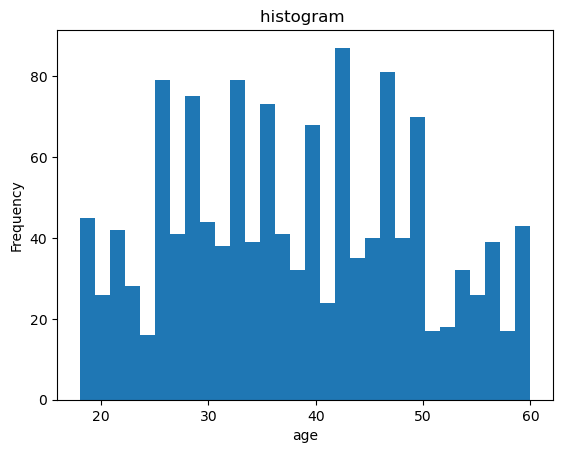

In [10]:
#histogram
data["age"].plot(kind='hist',bins=30, title="histogram ")
plt.xlabel("age")

Text(0.5, 0, 'age')

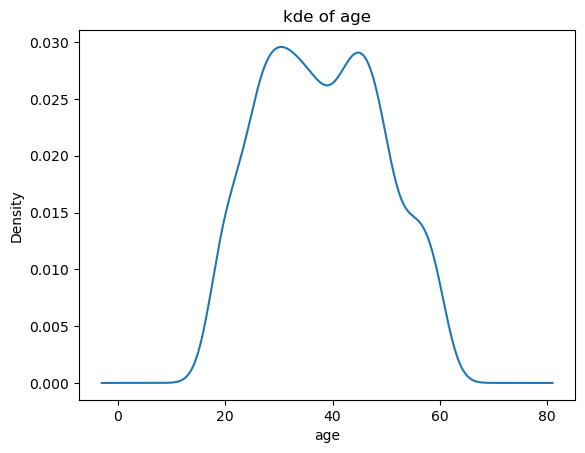

In [11]:
#kde plot...kernel density plot
data["age"].plot(kind='kde',title="kde of age")
plt.xlabel("age")

<Axes: >

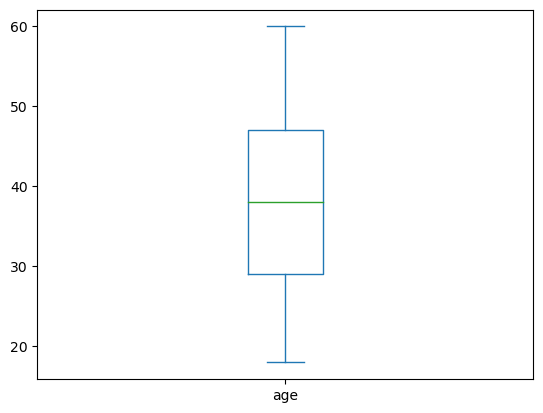

In [12]:
#Boxplot for outlier detection 
data["age"].plot(kind="box")

In [13]:
#skewness
data["age"].skew()

0.11361133741072633

In [14]:
#percentage of missing values
data["age"].isnull().sum()/len(data["age"])*100

0.3731343283582089

In [15]:
#fill the missing values
data[data["age"].isnull()]

index  PatientID  age gender   bmi  bloodpressure diabetic  children  \
2      2          3  NaN   male  33.3             82      Yes         0   
3      3          4  NaN   male  33.7             80       No         0   
4      4          5  NaN   male  34.1            100       No         0   
5      5          6  NaN   male  34.4             96      Yes         0   
6      6          7  NaN   male  37.3             86      Yes         0   

  smoker     region    claim  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  
5     No  northwest  1137.47  
6     No  northwest  1141.45

In [16]:
data[((data["bloodpressure"]<101) & (data["claim"]>80)) & ((data["claim"]<1140) & (data["claim"]>1130))].mean()["age"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\1259791548.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[((data["bloodpressure"]<101) & (data["claim"]>80)) & ((data["claim"]<1140) & (data["claim"]>1130))].mean()["age"]


24.0

In [17]:
#fill with mean age of that category
data["age"]=data["age"].fillna(24)

In [18]:
#no missing values
data["age"].isnull().sum()

0

<b>3.bloodpressure</b>
- conclusion
 1. lots of outliers but these ouliers are valid we can't remove them 
 2. highly positive skewed

In [19]:
#descriptive
data["bloodpressure"].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

Text(0.5, 0, 'bloodpressure')

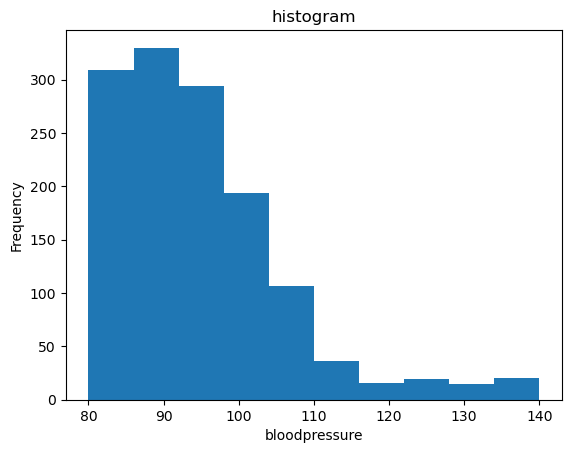

In [20]:
#histogram
data["bloodpressure"].plot(kind="hist",title="histogram")
plt.xlabel("bloodpressure")

Text(0.5, 0, 'bloodpressure')

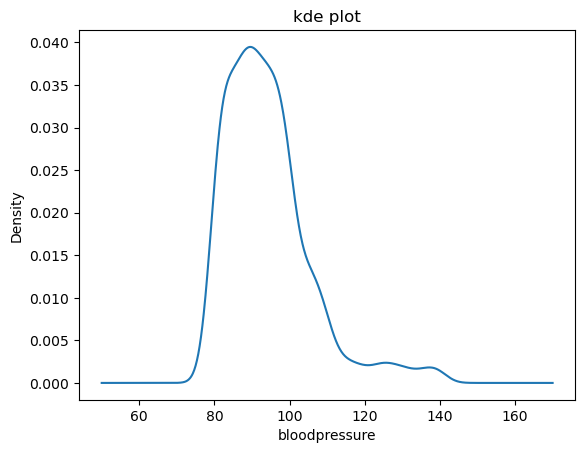

In [21]:
#KDE plot
data["bloodpressure"].plot(kind="kde",title="kde plot")
plt.xlabel("bloodpressure")

In [22]:
#skewness
data["bloodpressure"].skew()

1.4835342102293079

In [23]:
#missing values
data["bloodpressure"].isnull().sum()

0

<Axes: >

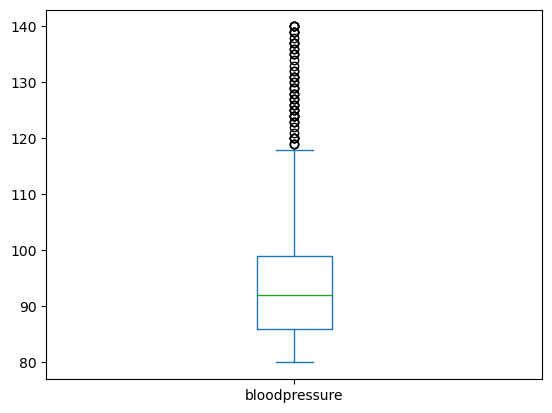

In [24]:
#box plot
data["bloodpressure"].plot(kind="box")

<b>4.Children</b>  
- conclusion
1. much gap in count of 0 and 5*  
2. highly positive skewed*


In [25]:
#as it has 5 categories but its datatype is int 
#we use value_counts(), count frequency of each category
data["children"].value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
data.groupby("children").mean()["claim"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\366570870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("children").mean()["claim"]


children
0    12327.993160
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: claim, dtype: float64

In [27]:
#describe
data["children"].describe()

count    1340.000000
mean        1.093284
std         1.205334
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Text(0.5, 0, 'children')

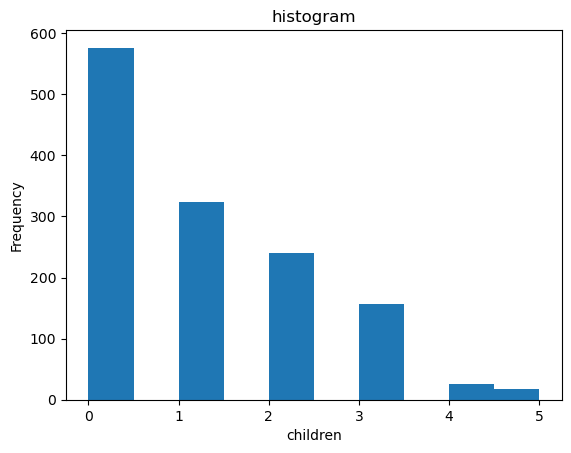

In [28]:
#histogram
data["children"].plot(kind="hist",title="histogram")
plt.xlabel("children")

Text(0.5, 0, 'children')

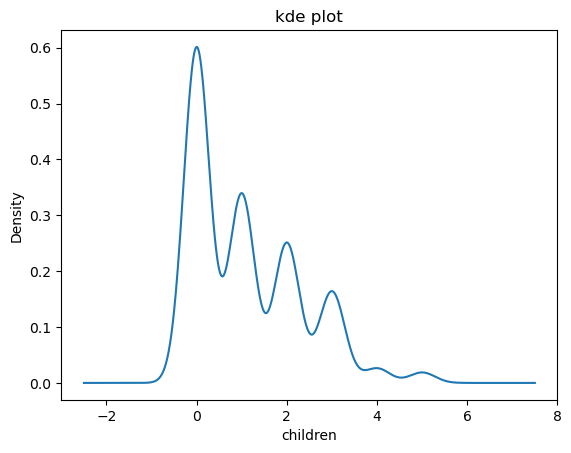

In [29]:
#kde plot
data["children"].plot(kind="kde",title="kde plot")
plt.xlabel("children")

In [30]:
#skewness
data["children"].skew()

0.9402991133470963

In [31]:
#missing values
data["children"].isnull().sum()

0

<Axes: title={'center': 'boxplot'}>

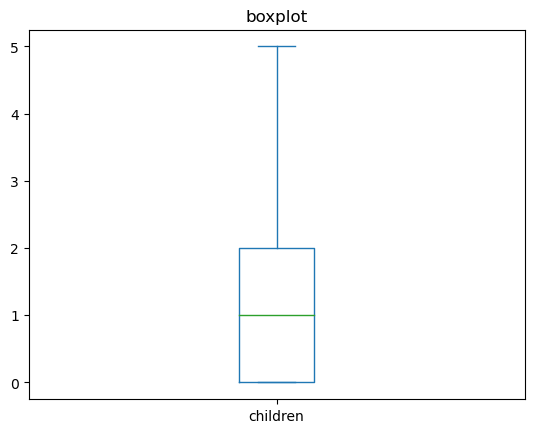

In [32]:
#boxplot
data["children"].plot(kind="box",title="boxplot")

**5.claim**
1. large amount of outliers but these are on the basis of give input bp and bmi which is ok
2. highly skewed

In [33]:
data["claim"].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

Text(0.5, 0, 'claim')

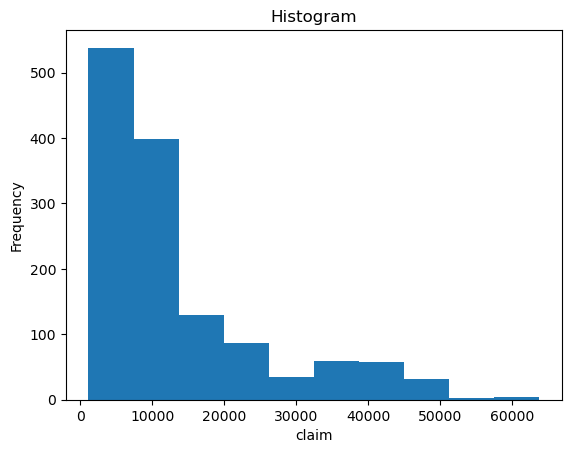

In [34]:
data["claim"].plot(kind="hist",title="Histogram")
plt.xlabel("claim")

Text(0.5, 0, 'claim')

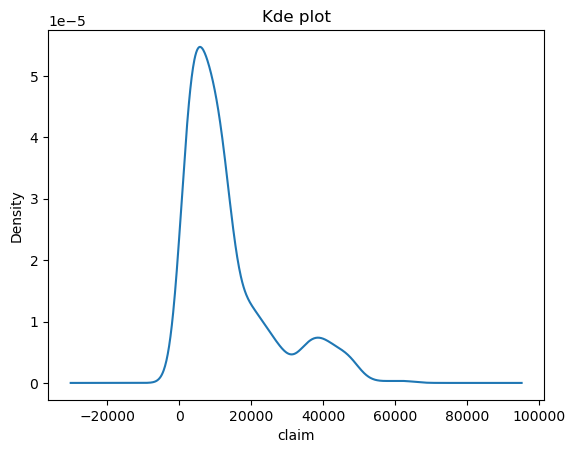

In [35]:
data["claim"].plot(kind="kde",title="Kde plot",xlabel="Claim")
plt.xlabel("claim")

In [36]:
data["claim"].skew()

1.5167468509489237

<Axes: >

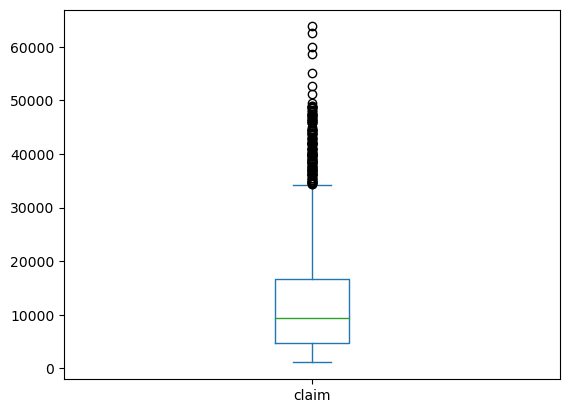

In [37]:
data["claim"].plot(kind="box")

In [38]:
data["claim"].isnull().sum()

0

In [39]:
data[data["claim"]>35000].groupby("gender").mean()[["age","bmi","bloodpressure","claim"]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\747770284.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data["claim"]>35000].groupby("gender").mean()[["age","bmi","bloodpressure","claim"]]


age        bmi  bloodpressure         claim
gender                                                   
female  42.632653  35.908163     111.367347  42954.338163
male    33.416667  35.567857     109.119048  42132.649286

**6.bmi**

### Steps of doing Univariate Analysis on Categorical columns

- **Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

- **Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

- **Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

**1.gender**

In [40]:
data["gender"].value_counts()

male      678
female    662
Name: gender, dtype: int64

In [41]:
data["gender"].isnull().sum()

0

<Axes: >

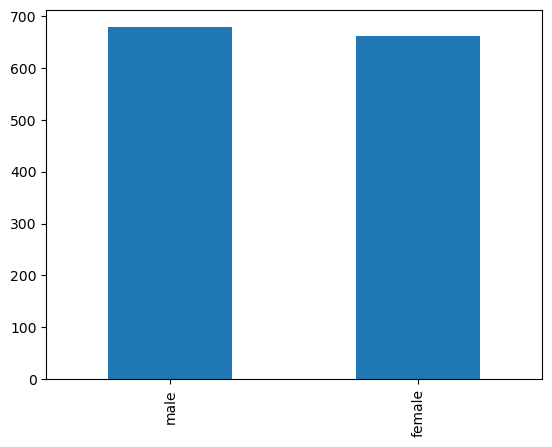

In [42]:
data["gender"].value_counts().plot(kind="bar")

<Axes: ylabel='gender'>

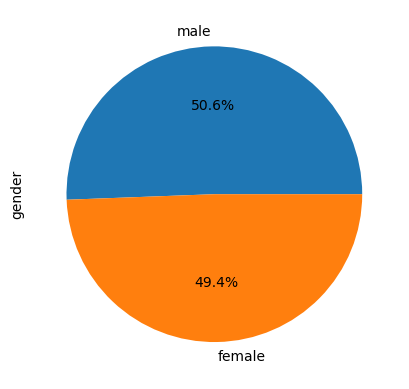

In [43]:
data["gender"].value_counts().plot(kind="pie",autopct='%0.1f%%')

**2.diabetic**
- 

In [44]:
data["diabetic"].value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

In [45]:
data["diabetic"].isnull().sum()

0

Text(0.5, 0, 'Daibetic')

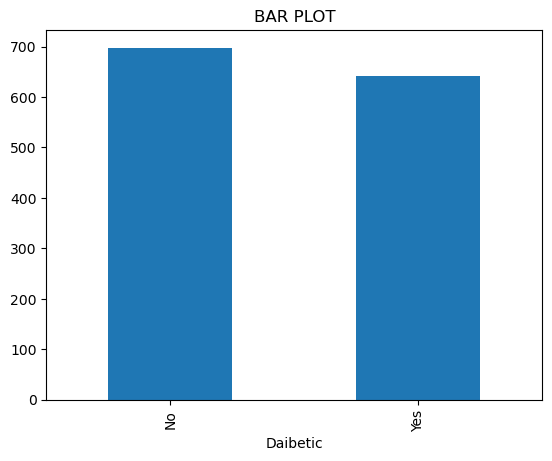

In [46]:
data["diabetic"].value_counts().plot(kind="bar",title="BAR PLOT")
plt.xlabel("Daibetic")

<Axes: ylabel='diabetic'>

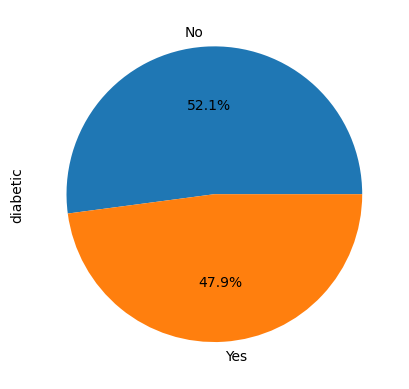

In [47]:
data["diabetic"].value_counts().plot(kind="pie",autopct='%0.1f%%')

**3.smoker**
- non smokers are much more than smokers

In [48]:
data["smoker"].value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

In [49]:
data["smoker"].isnull().sum()

0

Text(0.5, 0, 'Smoker')

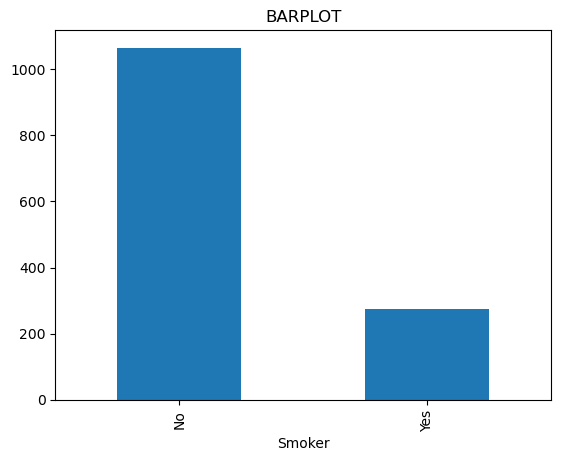

In [50]:
data["smoker"].value_counts().plot(kind="bar",title="BARPLOT")
plt.xlabel("Smoker")

<Axes: ylabel='smoker'>

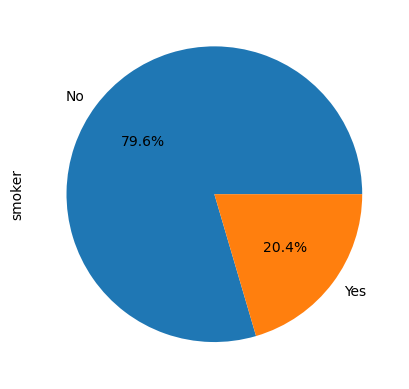

In [51]:
data["smoker"].value_counts().plot(kind="pie",autopct='%0.1f%%')

**4.region**
- 3missing values


In [52]:
data["region"].value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

In [53]:
data["region"].isnull().sum()

3

Text(0.5, 0, 'Region')

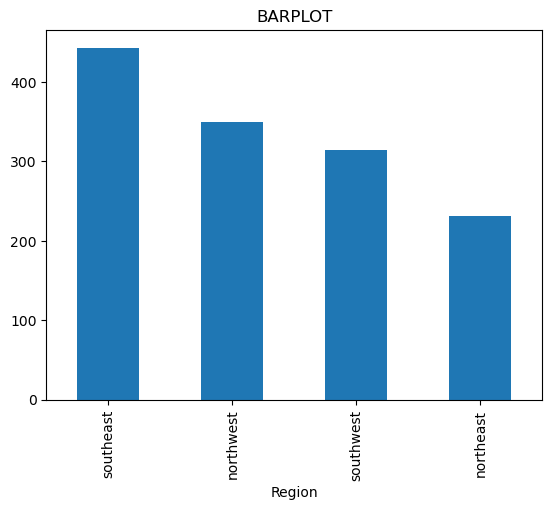

In [54]:
data["region"].value_counts().plot(kind="bar",title="BARPLOT")
plt.xlabel("Region")

<Axes: ylabel='region'>

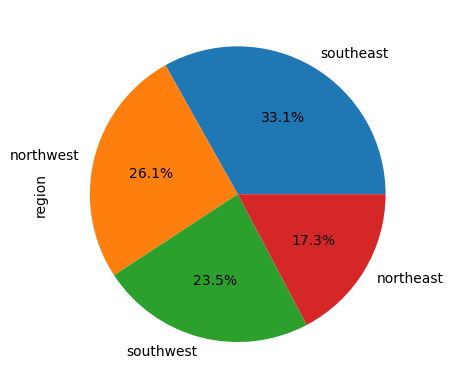

In [55]:
data["region"].value_counts().plot(kind="pie",autopct='%0.1f%%')

In [56]:
#fill missing values
data[data["region"].isnull()]

index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
13     13         14  32.0   male  27.6            100       No         0   
14     14         15  40.0   male  28.7             81      Yes         0   
15     15         16  32.0   male  30.4             86      Yes         0   

   smoker region    claim  
13     No    NaN  1252.41  
14     No    NaN  1253.94  
15     No    NaN  1256.30

In [57]:
data[data["claim"]<1300].groupby("region").mean()[["bmi","bloodpressure","age","claim"]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\1814377595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data["claim"]<1300].groupby("region").mean()[["bmi","bloodpressure","age","claim"]]


bmi  bloodpressure        age        claim
region                                                     
northwest  34.590909      90.000000  25.454545  1171.640000
southeast  28.866667      86.666667  29.000000  1129.773333
southwest  34.633333      90.333333  41.666667  1262.183333

In [58]:
data["region"]=data["region"].fillna("southwest")

In [59]:
data[data["region"].isnull()]

Empty DataFrame
Columns: [index, PatientID, age, gender, bmi, bloodpressure, diabetic, children, smoker, region, claim]
Index: []

# ***bivariate analysis

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like **scatterplot(regression plots), 2D histplot, 2D KDEplots**<br>
        b. Check **correlation coefficent** to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like **barplot, boxplot, kdeplot violinplot even scatterplots**<br>
    3. **Categorical - Categorical**<br>
        a. You can create **cross-tabulations** or **contingency tables** that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like **heatmap, stacked barplots, treemaps**
        
- Write your conclusions

**Categorical-categorical**

*1.Gender-diabetic*
- females are more diabetic than males

In [60]:
#contigency table
pd.crosstab(data["gender"],data["diabetic"])

diabetic   No  Yes
gender            
female    339  323
male      359  319

In [61]:
#percentage of values
pd.crosstab(data["gender"],data["diabetic"],normalize="columns")*100

diabetic         No        Yes
gender                        
female    48.567335  50.311526
male      51.432665  49.688474

<Axes: xlabel='diabetic', ylabel='gender'>

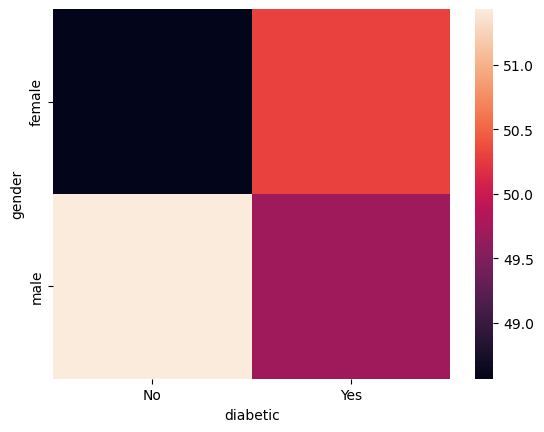

In [62]:
#heatmap of above table
sns.heatmap(pd.crosstab(data["gender"],data["diabetic"],normalize="columns")*100)

*2.Gender- Smoker*
- males do smoke more than females

In [63]:
#contigency table
pd.crosstab(data["gender"],data["smoker"])

smoker   No  Yes
gender          
female  547  115
male    519  159

In [64]:
#percentage
pd.crosstab(data["gender"],data["smoker"],normalize="columns")*100

smoker         No        Yes
gender                      
female  51.313321  41.970803
male    48.686679  58.029197

<Axes: xlabel='smoker', ylabel='gender'>

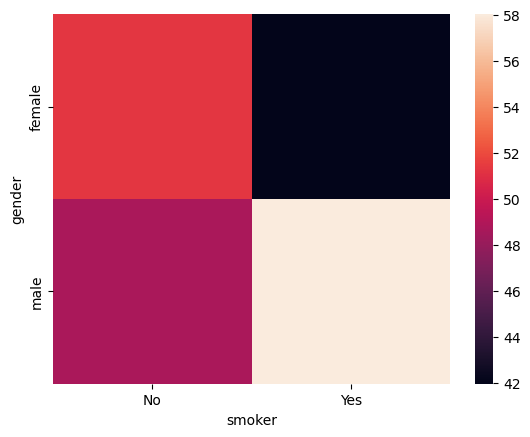

In [65]:
#heatmap
sns.heatmap(pd.crosstab(data["gender"],data["smoker"],normalize="columns")*100)

*3.Region- Smoker*
- northeast ..smoking area
- northwest & southwest..less smoking
- southeast has equal no. of smokers and non smokers 

In [66]:
#contigency table
pd.crosstab(data["region"],data["smoker"],normalize='columns')*100

smoker            No        Yes
region                         
northeast  15.384615  24.452555
northwest  27.298311  21.167883
southeast  33.020638  33.211679
southwest  24.296435  21.167883

<Axes: xlabel='smoker', ylabel='region'>

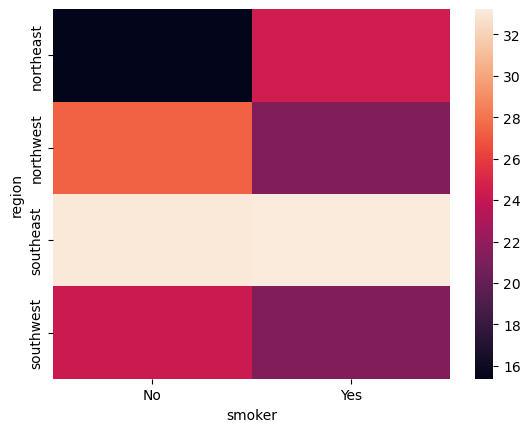

In [67]:
#heatmap
sns.heatmap(pd.crosstab(data["region"],data["smoker"],normalize='columns')*100)

*4.region - diabetic*
- east has diabetic people
- west has less diabetic people

<Axes: xlabel='diabetic', ylabel='region'>

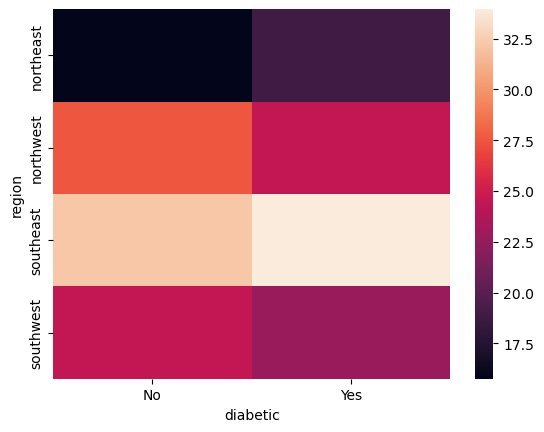

In [68]:
sns.heatmap(pd.crosstab(data["region"],data["diabetic"],normalize='columns')*100)

*5.diabetic -smoker*

In [69]:
pd.crosstab(data["diabetic"],data["smoker"],normalize='columns')*100

smoker           No        Yes
diabetic                      
No        52.532833  50.364964
Yes       47.467167  49.635036

<Axes: xlabel='smoker', ylabel='diabetic'>

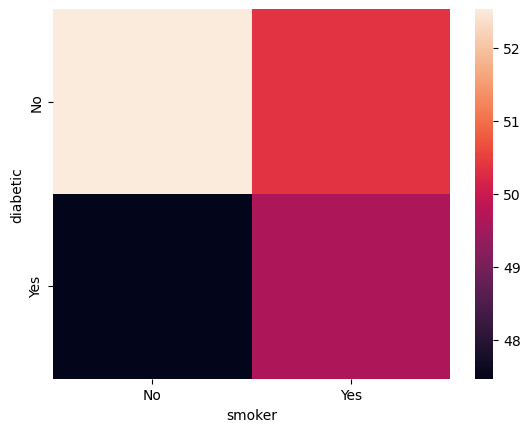

In [70]:
sns.heatmap(pd.crosstab(data["diabetic"],data["smoker"],normalize='columns')*100)

**Numerical-Numerical**

1.Diabetic vs age
- age 30 to 50 having more diabetic patients
- non diabetic patients are more in number
- 

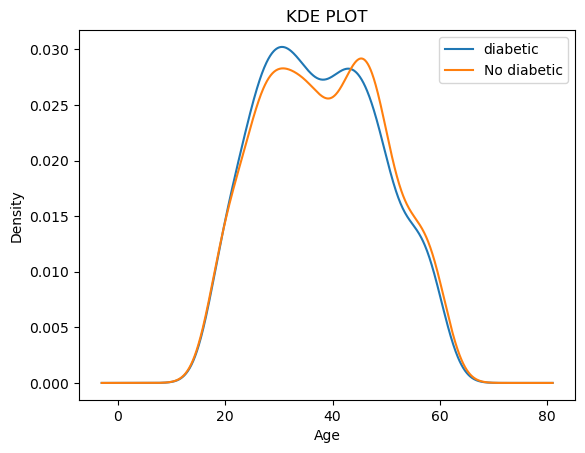

In [71]:
data[data['diabetic'] == "Yes"]['age'].plot(kind='kde',label='diabetic')
data[data['diabetic'] == "No"]['age'].plot(kind='kde',label='No diabetic')
plt.title("KDE PLOT")
plt.xlabel("Age")
plt.legend()
plt.show()

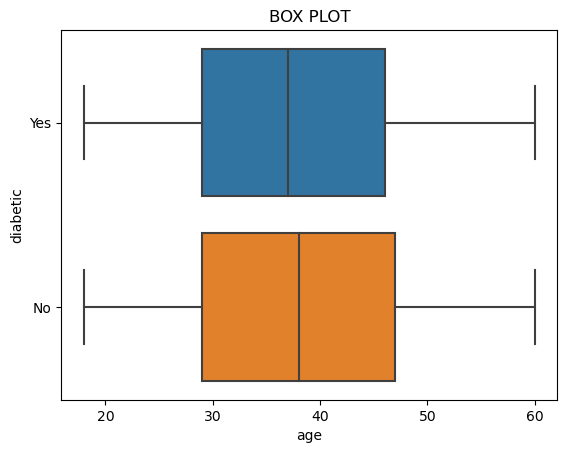

In [72]:
#boxplot(data,x,y)
sns.boxplot(data=data,x="age",y="diabetic")
plt.title("BOX PLOT")
plt.show()

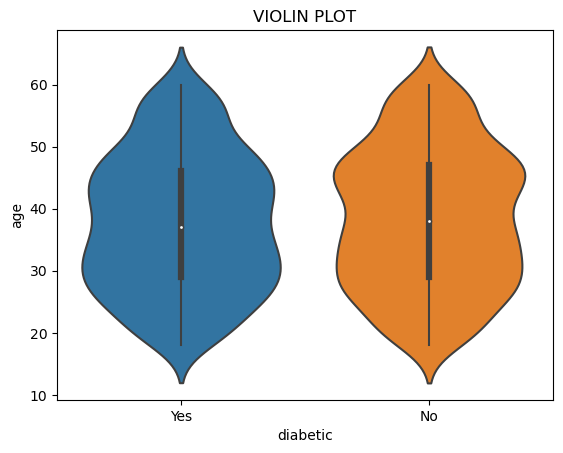

In [73]:
sns.violinplot(data=data,x="diabetic",y="age")
plt.title("VIOLIN PLOT")
plt.show()

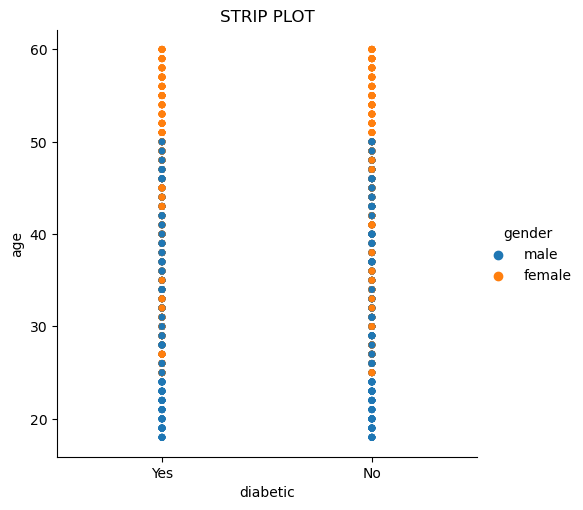

In [74]:
sns.catplot(data=data,x="diabetic",y="age",kind="strip",jitter=0,hue="gender")
plt.title("STRIP PLOT")
plt.show()

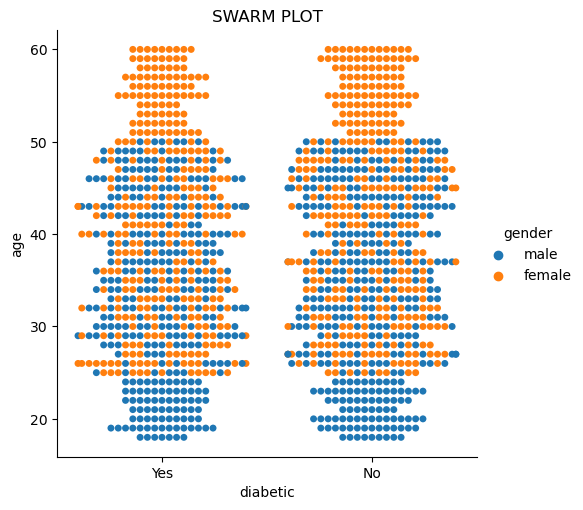

In [75]:
sns.catplot(data=data,x="diabetic",y="age",kind="swarm",hue="gender")
plt.title("SWARM PLOT")
plt.show()

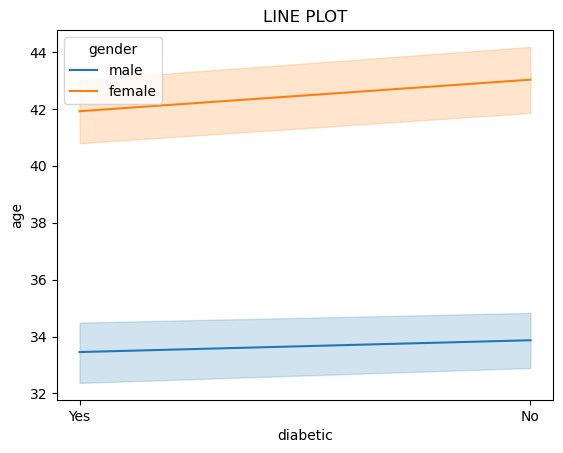

In [76]:
sns.lineplot(data=data,x="diabetic",y="age",hue="gender")
plt.title("LINE PLOT")
plt.show()

2.Smoker vs age
- non smokers are more in number

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


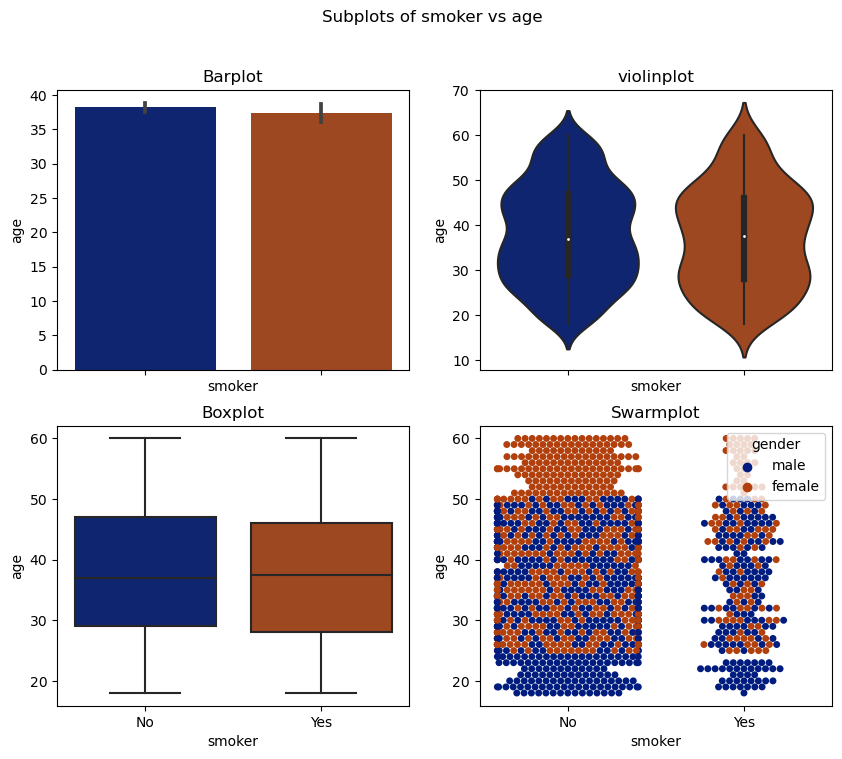

In [77]:
#age-smoker
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="smoker",y="age",palette="dark")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="smoker",y="age",palette="dark")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="smoker",y="age",palette="dark")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="smoker",y="age",hue="gender",palette="dark")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of smoker vs age")
plt.show()

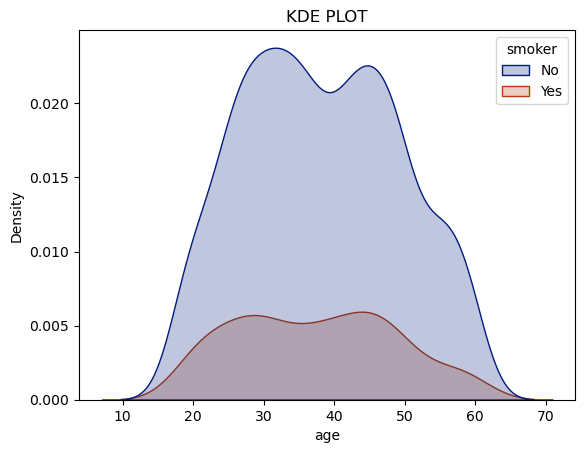

In [78]:
sns.kdeplot(data=data,x="age",hue="smoker",fill=True,palette="dark")
plt.title("KDE PLOT")
plt.show()

3.Gender vs BMI
- generally bmi of male is higher than female

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\267500785.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(ax=ax[1,1],data=data,x="gender",y="bmi",palette="viridis")
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.6% of the points cannot be plac

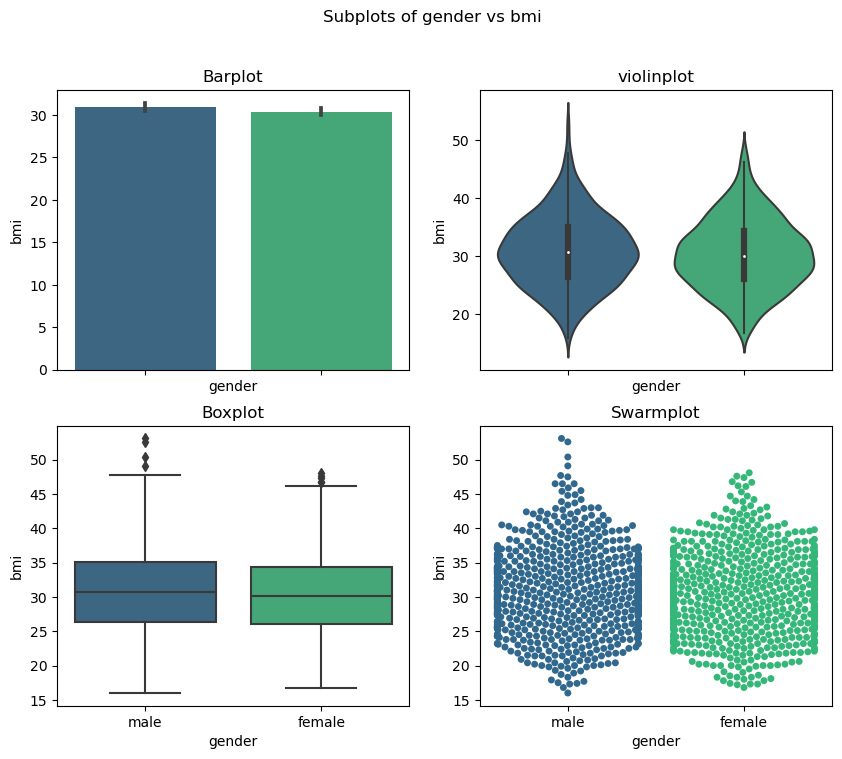

In [79]:
#gender-bmi
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="gender",y="bmi",palette="viridis")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="gender",y="bmi",palette="viridis")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="gender",y="bmi",palette="viridis")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="gender",y="bmi",palette="viridis")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of gender vs bmi")
plt.show()

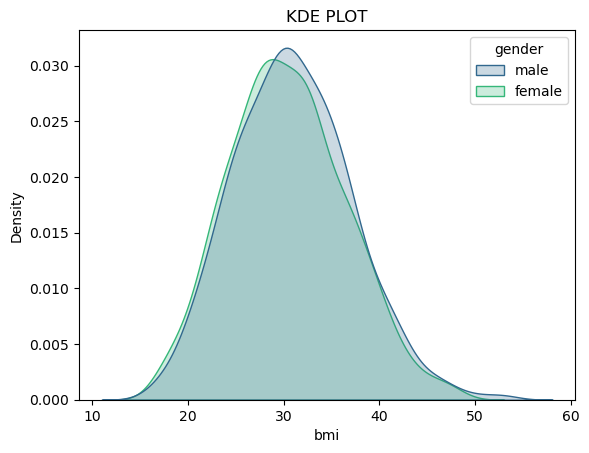

In [80]:
sns.kdeplot(data=data,x="bmi",hue="gender",fill=True,palette="viridis")
plt.title("KDE PLOT")
plt.show()

4.diabetic vs bmi
- generally dibetic pateint has high bmi

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


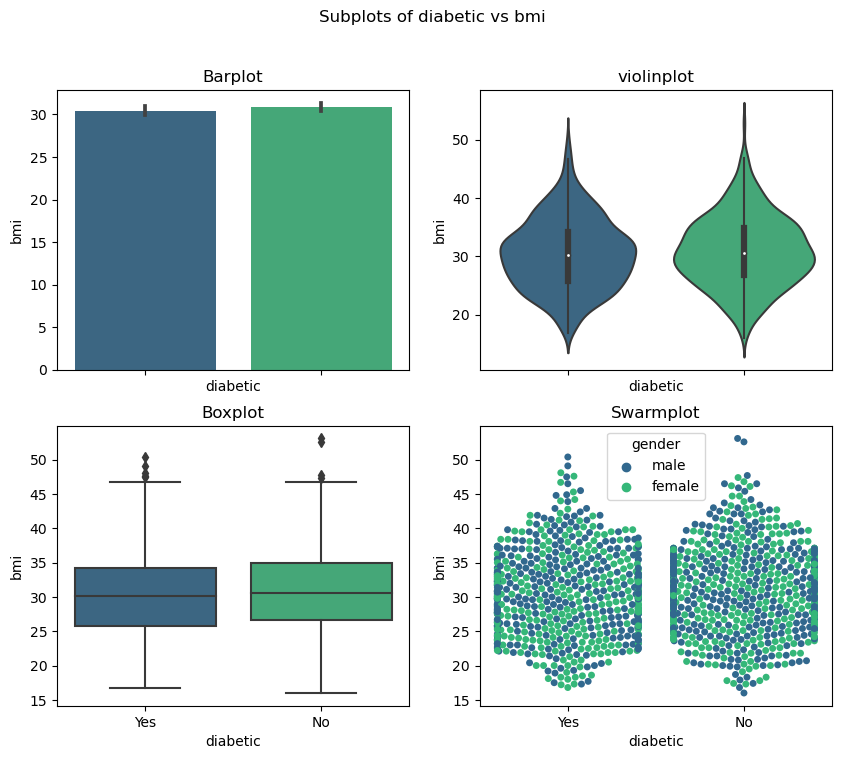

In [81]:
#bmi-dia
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="diabetic",y="bmi",palette="viridis")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="diabetic",y="bmi",palette="viridis")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="diabetic",y="bmi",palette="viridis")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="diabetic",y="bmi",hue="gender",palette="viridis")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of diabetic vs bmi")
plt.show()

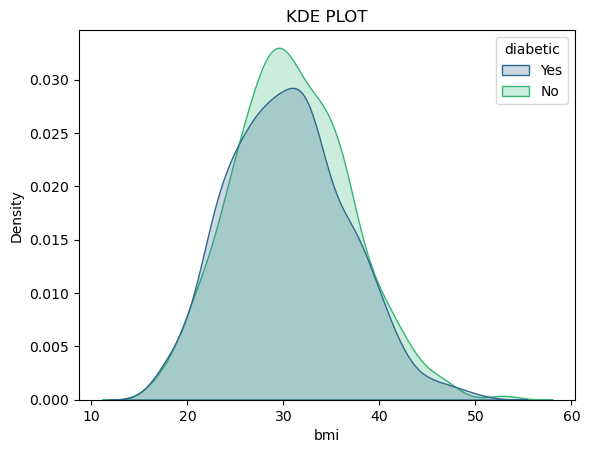

In [82]:
sns.kdeplot(data=data,x="bmi",hue="diabetic",fill=True,palette="viridis")
plt.title("KDE PLOT")
plt.show()

5.gender-bloodpressure
- having ouliers in bp..means high bp 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


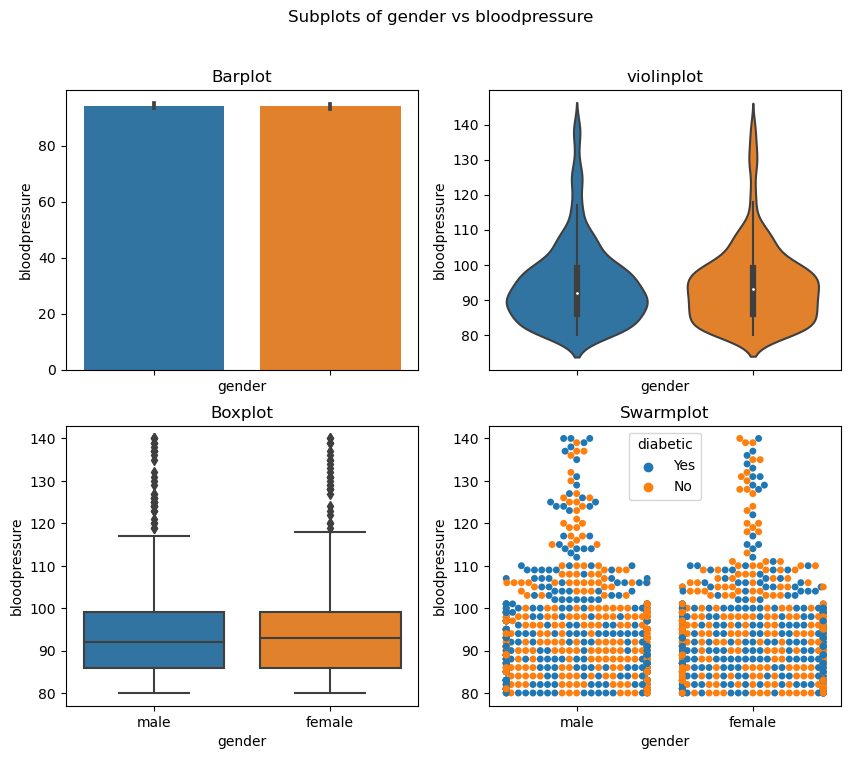

In [83]:
#gender-bloodpressure
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="gender",y="bloodpressure")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="gender",y="bloodpressure")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="gender",y="bloodpressure")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="gender",y="bloodpressure",hue="diabetic")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of gender vs bloodpressure")
plt.show()

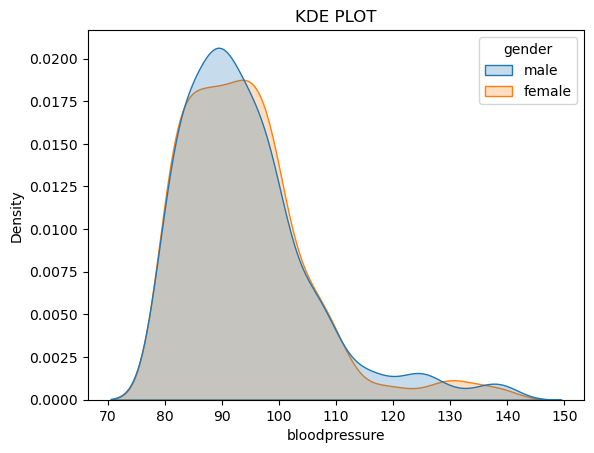

In [84]:
sns.kdeplot(data=data,x="bloodpressure",hue="gender",fill=True)
plt.title("KDE PLOT")
plt.show()

6.gender-claim
- generally female have less claim than males
- mostly claims are less than 40000

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


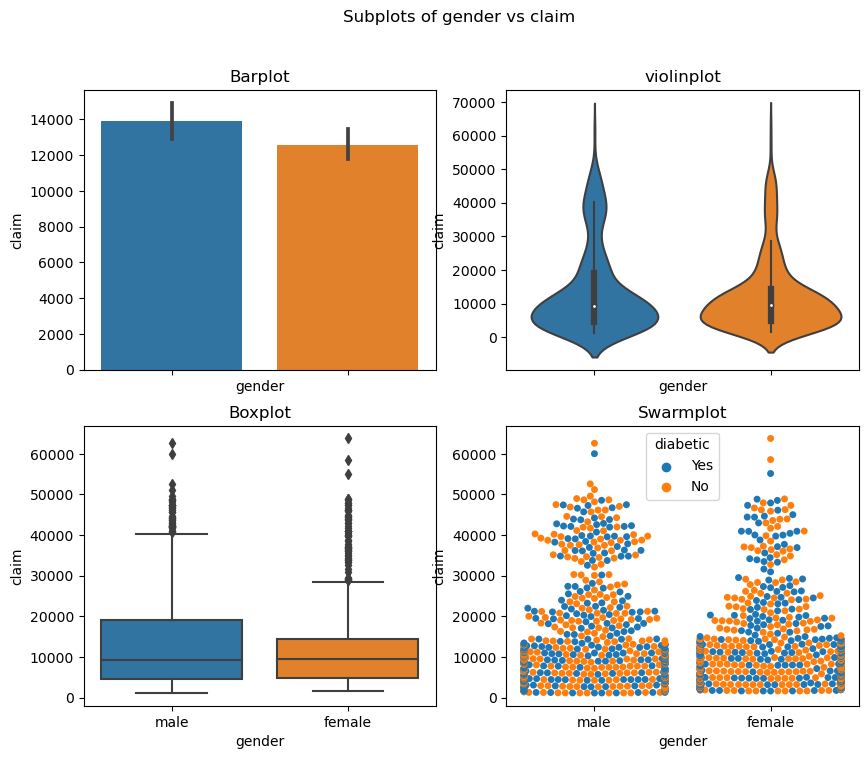

In [85]:
#gender-claim

fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="gender",y="claim")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="gender",y="claim")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="gender",y="claim")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="gender",y="claim",hue="diabetic")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of gender vs claim")
plt.show()

In [86]:
data.groupby("gender").mean()["claim"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\1023454114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("gender").mean()["claim"]


gender
female    12569.578897
male      13919.790457
Name: claim, dtype: float64

In [87]:
data.groupby("gender").max()["claim"]

gender
female    63770.43
male      62592.87
Name: claim, dtype: float64

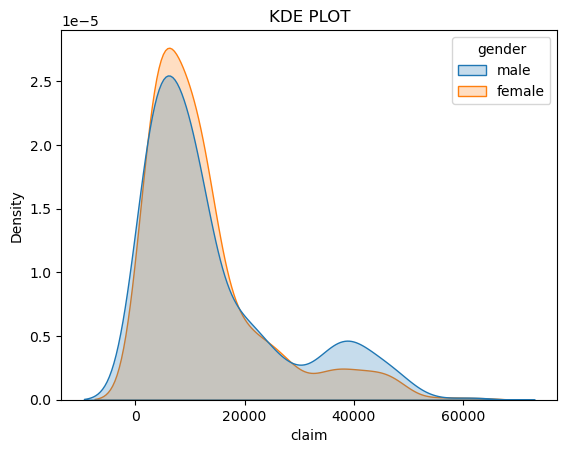

In [88]:
sns.kdeplot(data=data,x="claim",hue="gender",fill=True)
plt.title("KDE PLOT")
plt.show()

7.bp vs diabetic

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


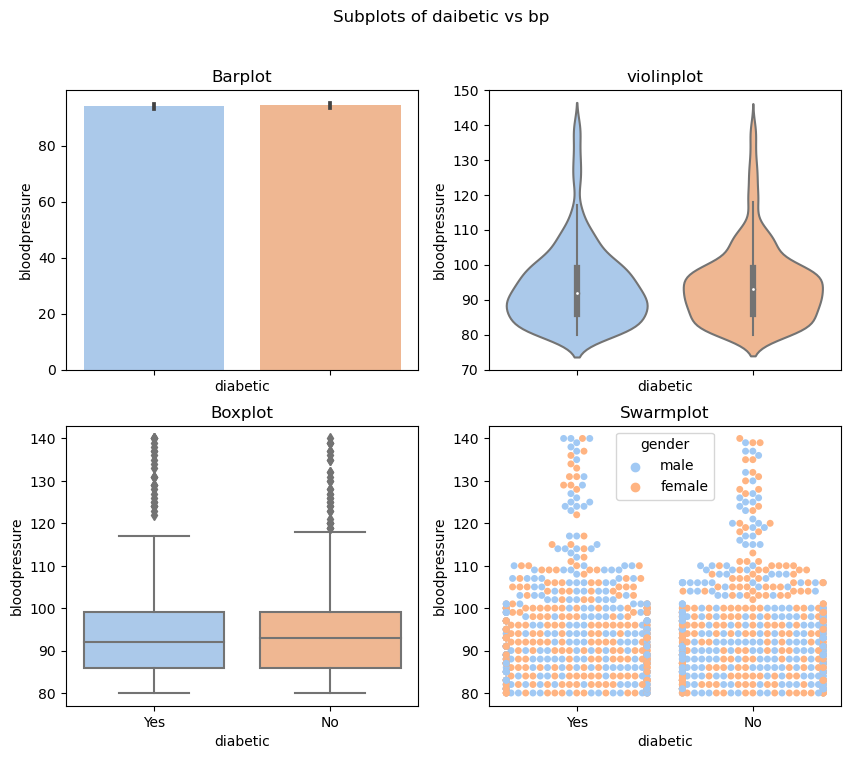

In [89]:
#bp-dia
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="diabetic",y="bloodpressure",palette="pastel")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="diabetic",y="bloodpressure",palette="pastel")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="diabetic",y="bloodpressure",palette="pastel")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="diabetic",y="bloodpressure",hue="gender",palette="pastel")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of daibetic vs bp")
plt.show()

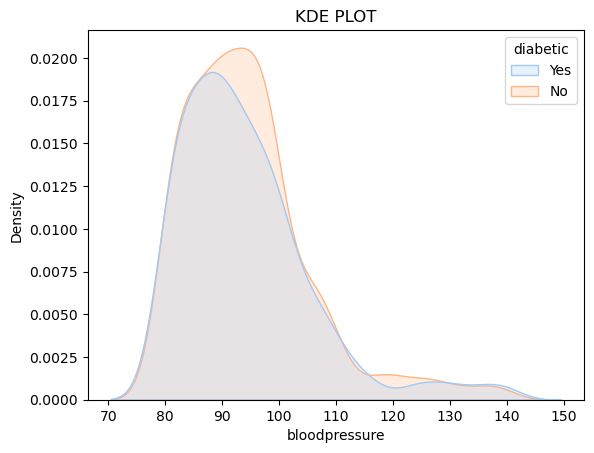

In [90]:
sns.kdeplot(data=data,x="bloodpressure",hue="diabetic",fill=True,palette="pastel")
plt.title("KDE PLOT")
plt.show()

8.diabetic vs claim
- non diabetic high claim

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


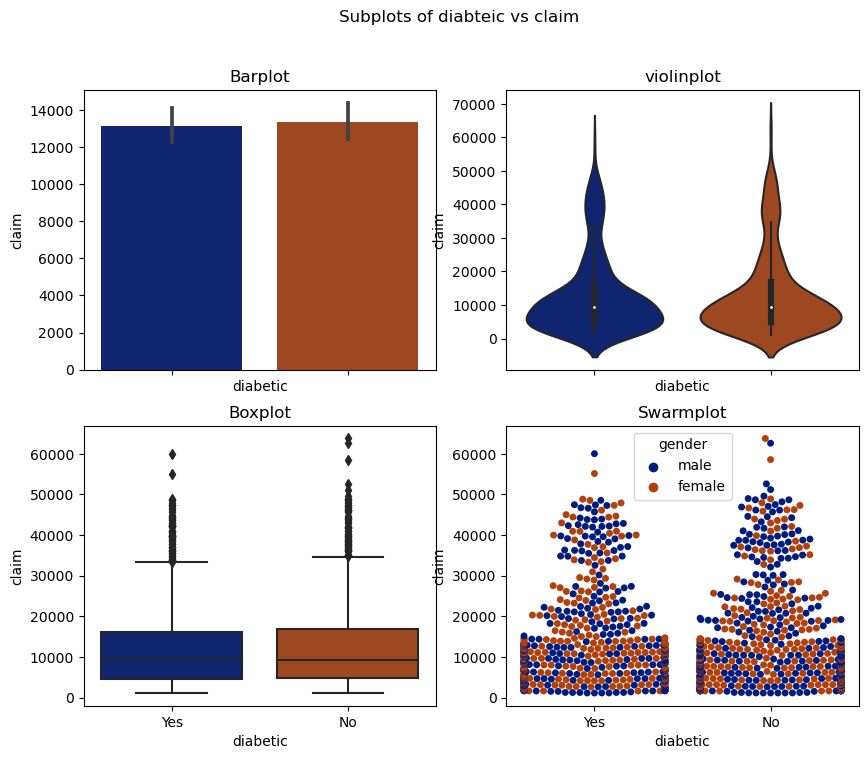

In [91]:
#dia-claim
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="diabetic",y="claim",palette="dark")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="diabetic",y="claim",palette="dark")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="diabetic",y="claim",palette="dark")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="diabetic",y="claim",hue="gender",palette="dark")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of diabteic vs claim")
plt.show()

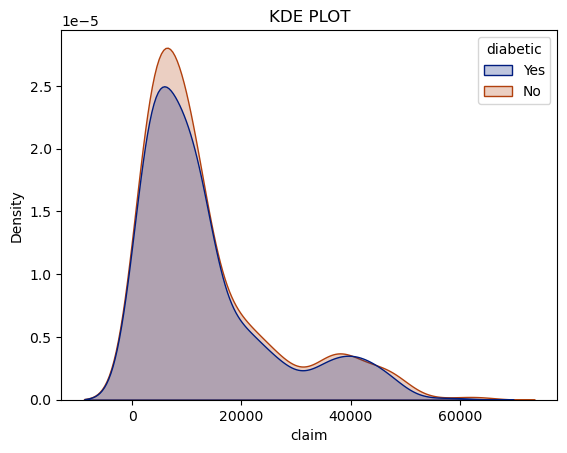

In [92]:
sns.kdeplot(data=data,x="claim",hue="diabetic",fill=True,palette="dark")
plt.title("KDE PLOT")
plt.show()

9.smoker vs claim
- non smoker having low claim

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


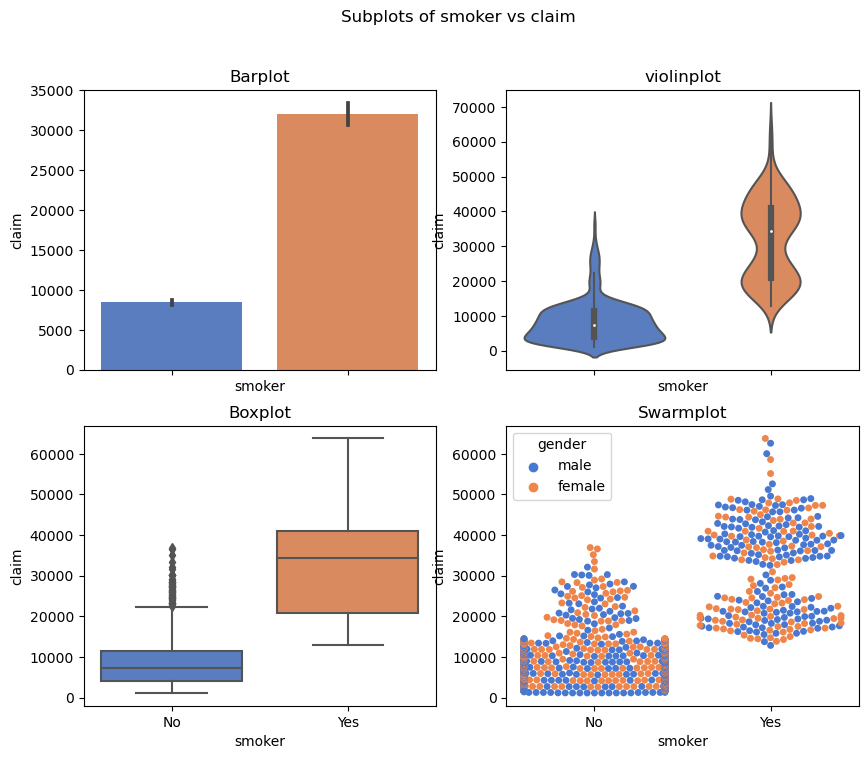

In [93]:
#smoker-claim
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="smoker",y="claim",palette="muted")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="smoker",y="claim",palette="muted")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="smoker",y="claim",palette="muted")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="smoker",y="claim",hue="gender",palette="muted")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of smoker vs claim")
plt.show()

In [94]:
data.groupby("smoker").mean()["claim"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\3507075404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("smoker").mean()["claim"]


smoker
No      8421.121576
Yes    32050.231971
Name: claim, dtype: float64

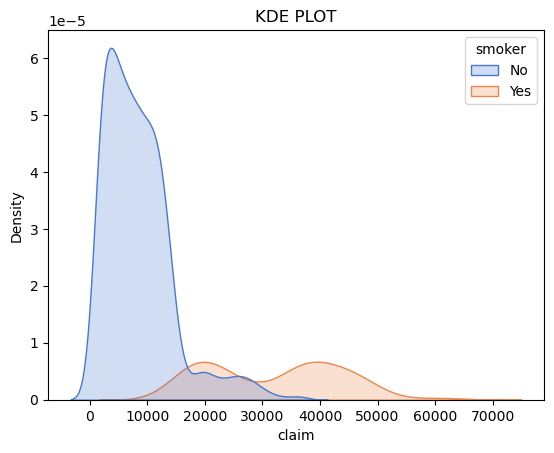

In [95]:
sns.kdeplot(data=data,x="claim",hue="smoker",fill=True,palette="muted")
plt.title("KDE PLOT")
plt.show()

12.gender vs children
- almost equal contribution

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


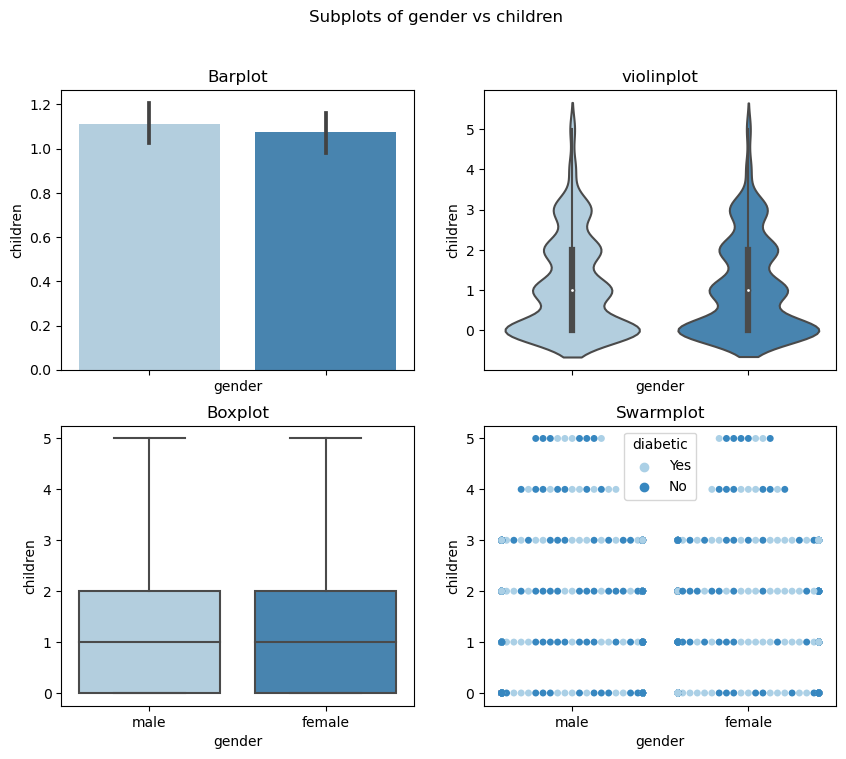

In [96]:

fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="gender",y="children",palette="Blues")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="gender",y="children",palette="Blues")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="gender",y="children",palette="Blues")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="gender",y="children",hue="diabetic",palette="Blues")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of gender vs children")
plt.show()

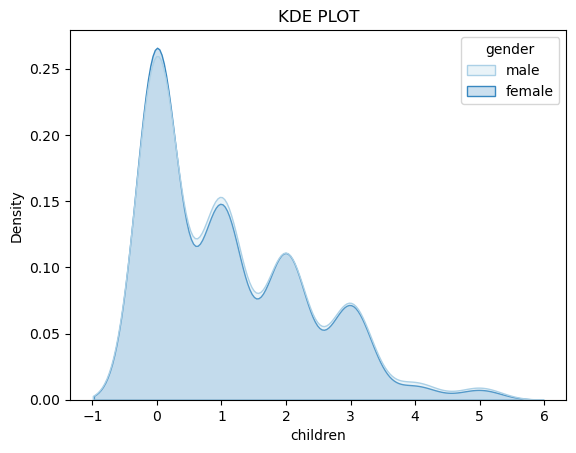

In [97]:
sns.kdeplot(data=data,x="children",hue="gender",fill=True,palette="Blues")
plt.title("KDE PLOT")
plt.show()

11.region vs claim
- southeast>northwest>northeast>southwest..max

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


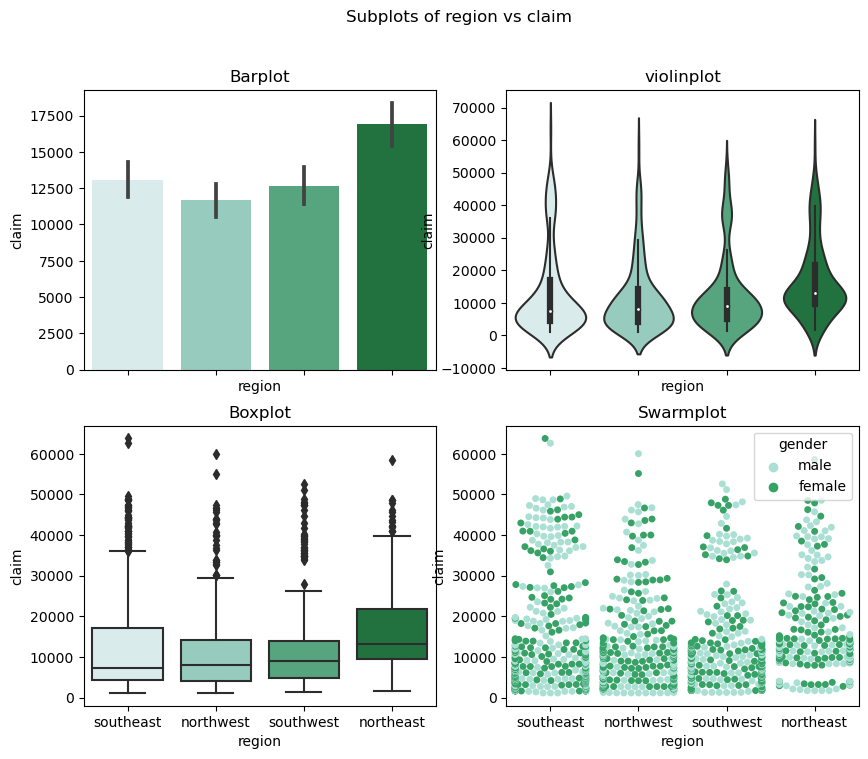

In [98]:
#region-claim
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,8))

sns.barplot(ax=ax[0,0],data=data,x="region",y="claim",palette="BuGn")
ax[0,0].set_title("Barplot")

sns.violinplot(ax=ax[0,1],data=data,x="region",y="claim",palette="BuGn")
ax[0,1].set_title("violinplot")

sns.boxplot(ax=ax[1,0],data=data,x="region",y="claim",palette="BuGn")
ax[1,0].set_title("Boxplot")

sns.swarmplot(ax=ax[1,1],data=data,x="region",y="claim",hue="gender",palette="BuGn")
ax[1,1].set_title("Swarmplot")

fig.suptitle("Subplots of region vs claim")
plt.show()

In [99]:
data.groupby("region").max()["claim"]

region
northeast    58571.07
northwest    60021.40
southeast    63770.43
southwest    52590.83
Name: claim, dtype: float64

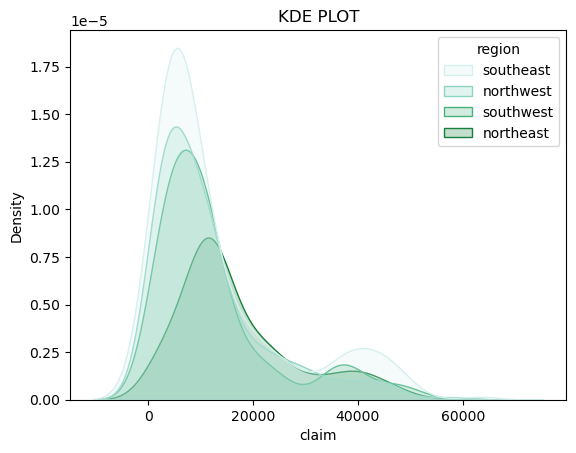

In [100]:
sns.kdeplot(data=data,x="claim",hue="region",fill=True,palette="BuGn")
plt.title("KDE PLOT")
plt.show()

## Numerical vs numerical & multivariate analysis
1. scatterplot
2. kde
3. hist
4. regplot
5. jointplot
6. correlation

- pairplot(kde,scatter)
- pairgrid(box,2dhist)
- jointplot(hist2d and hist)

In [108]:
data=data.drop(columns=["index"])

KeyError: "['index'] not found in axis"

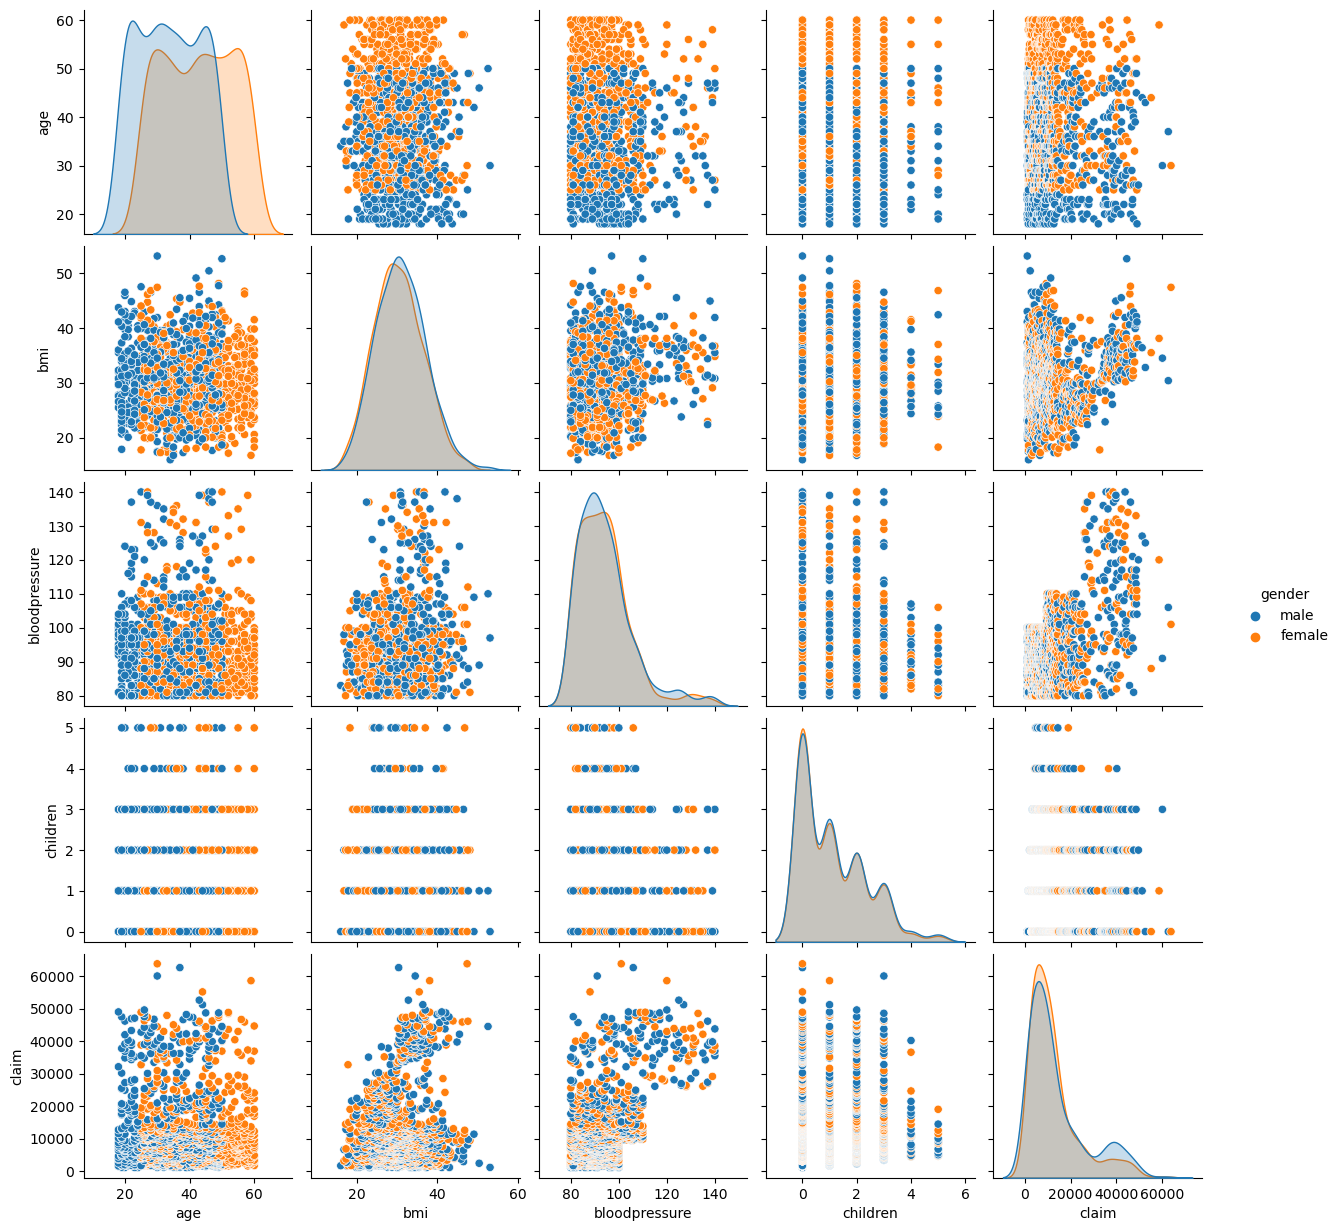

In [102]:
sns.pairplot(data,hue='gender')
plt.show()

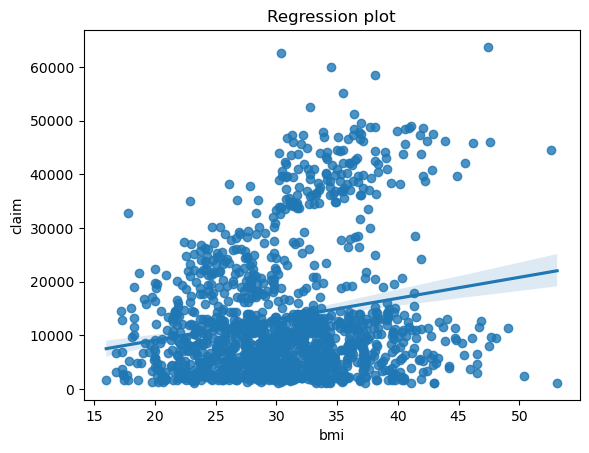

In [103]:
sns.regplot(x="bmi",y="claim",data=data)
plt.title("Regression plot")
plt.show()

* conclusion
1. weak positive correlation
2. High density of data points with claims below 10,000 indicates that most individuals, regardless of BMI, have lower insurance claims.

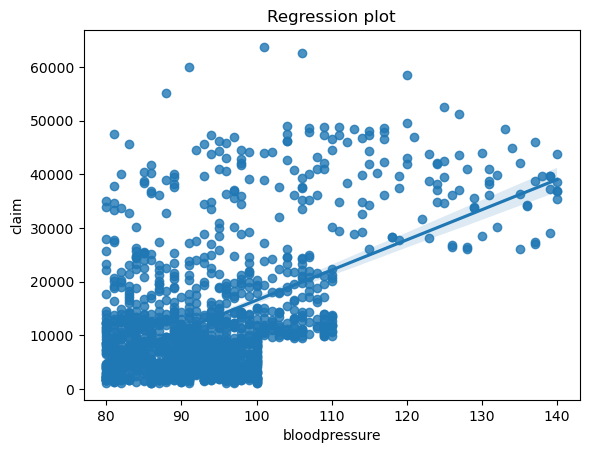

In [104]:
sns.regplot(x="bloodpressure",y="claim",data=data)
plt.title("Regression plot")
plt.show()

- conclusion
1. Positive Correlation
2. High Density at Lower Claims

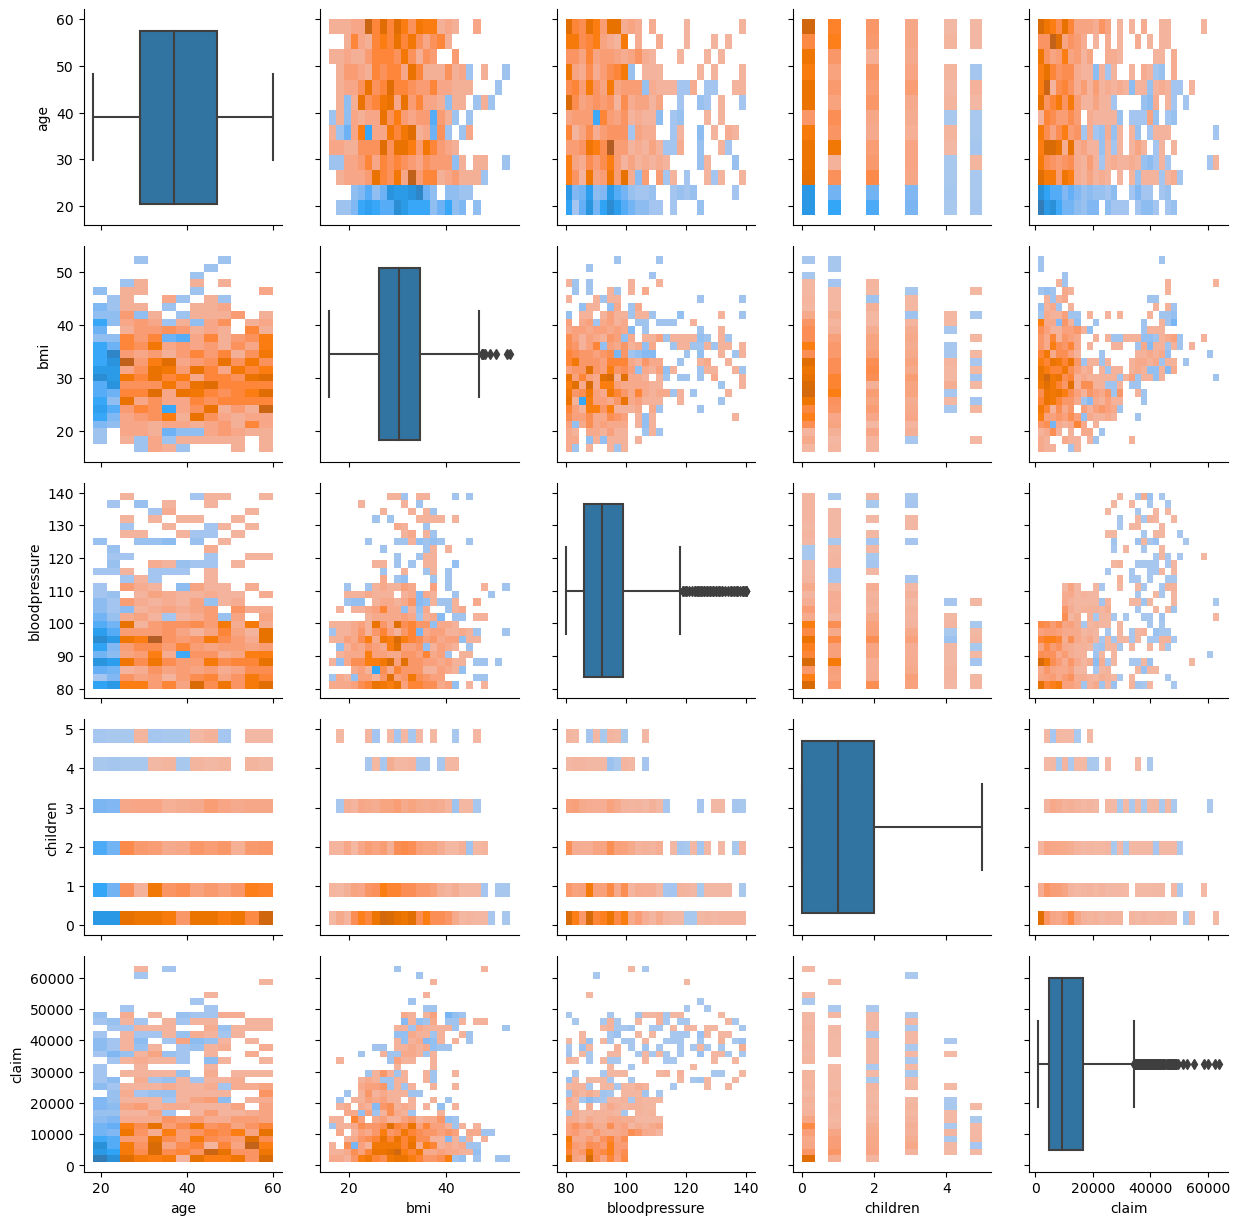

In [105]:
g = sns.PairGrid(data=data,hue='gender')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.histplot)


- conclusion
1. outliers in bmi,bp and claim

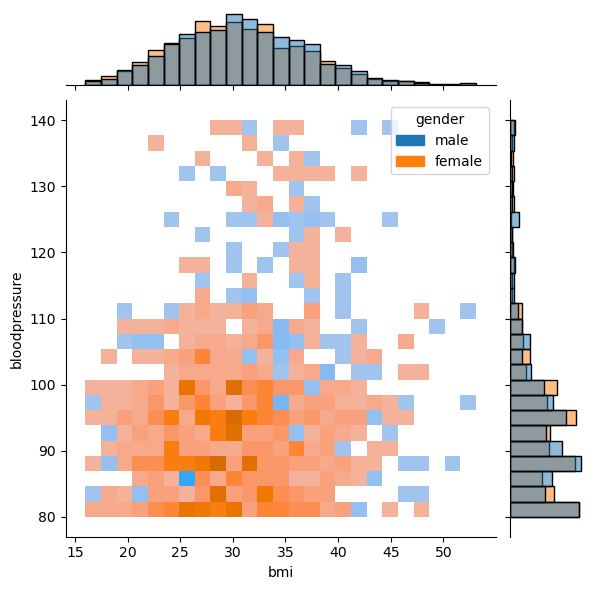

In [106]:
sns.jointplot(data=data,x='bmi',y='bloodpressure',kind='hist',hue='gender')

- conclusion
1. weak positive correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_14768\3101122045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<Axes: >

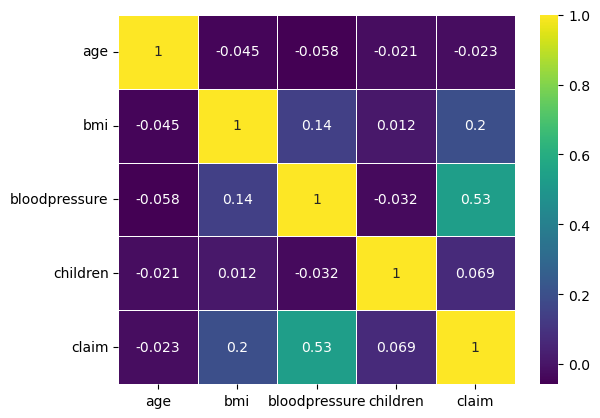

In [107]:
cor=data.corr()
sns.heatmap(data=cor,annot=True,linewidth=0.5,cmap="viridis")


- conclusion
1. -ve coorelation between age and all others.
2. +ve correlation between bmi and (bp, children, claim)
3. -ve coorelation between children and bp.
4. +ve correlation between claim and (bp,children).